<a href="https://colab.research.google.com/github/bksgupta/course-v3/blob/master/lesson3_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image segmentation with CamVid

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [5]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [6]:
path_lbl = path/'labels'
path_img = path/'images'

In [7]:
path

PosixPath('/root/.fastai/data/camvid')

## Subset classes

In [8]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

## Data

In [9]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0016E5_01050.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_007800.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00600.png')]

In [10]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_07530_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f00450_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03390_P.png')]

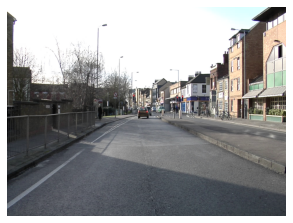

In [11]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [12]:
img.shape

torch.Size([3, 720, 960])

In [13]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [14]:
img_f

PosixPath('/root/.fastai/data/camvid/images/0016E5_01050.png')

In [15]:
img_f.stem

'0016E5_01050'

In [16]:
get_y_fn(img_f)

PosixPath('/root/.fastai/data/camvid/labels/0016E5_01050_P.png')

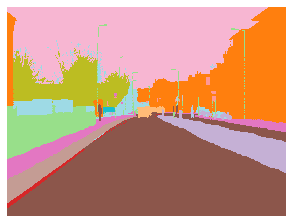

In [17]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [18]:
mask.shape

torch.Size([1, 720, 960])

In [19]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[21, 21, 21,  ...,  4,  4,  4],
          [21, 21, 21,  ...,  4,  4,  4],
          [21, 21, 21,  ...,  4,  4,  4],
          ...,
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17]]]))

In [20]:
mask.data.shape

torch.Size([1, 720, 960])

In [21]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [22]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 11430MB of GPU RAM free


In [23]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [22]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

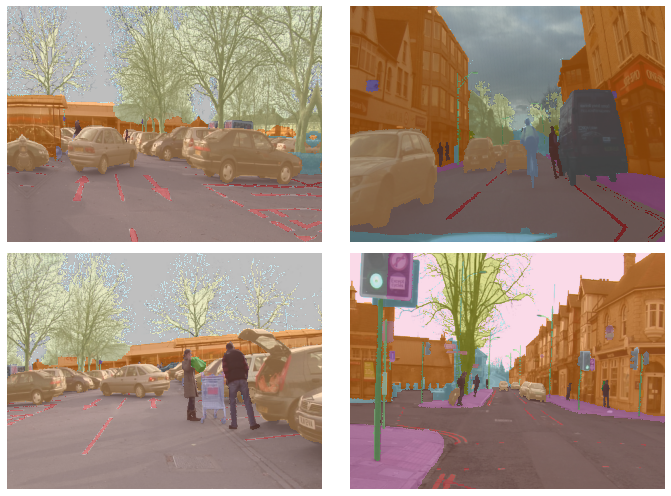

In [23]:
data.show_batch(2, figsize=(10,7))

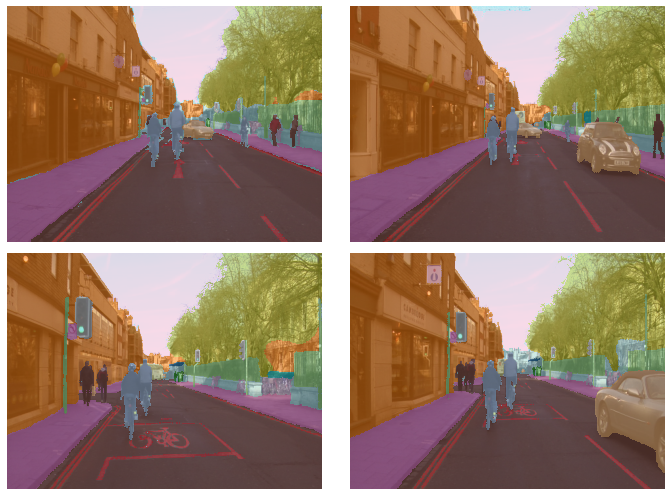

In [24]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [25]:
path

PosixPath('/root/.fastai/data/camvid')

In [26]:
!cat  '/root/.fastai/data/camvid/valid.txt'

0016E5_07959.png
0016E5_07961.png
0016E5_07963.png
0016E5_07965.png
0016E5_07967.png
0016E5_07969.png
0016E5_07971.png
0016E5_07973.png
0016E5_07975.png
0016E5_07977.png
0016E5_07979.png
0016E5_07981.png
0016E5_07983.png
0016E5_07985.png
0016E5_07987.png
0016E5_07989.png
0016E5_07991.png
0016E5_07993.png
0016E5_07995.png
0016E5_07997.png
0016E5_07999.png
0016E5_08001.png
0016E5_08003.png
0016E5_08005.png
0016E5_08007.png
0016E5_08009.png
0016E5_08011.png
0016E5_08013.png
0016E5_08015.png
0016E5_08017.png
0016E5_08019.png
0016E5_08021.png
0016E5_08023.png
0016E5_08025.png
0016E5_08027.png
0016E5_08029.png
0016E5_08031.png
0016E5_08033.png
0016E5_08035.png
0016E5_08037.png
0016E5_08039.png
0016E5_08041.png
0016E5_08043.png
0016E5_08045.png
0016E5_08047.png
0016E5_08049.png
0016E5_08051.png
0016E5_08053.png
0016E5_08055.png
0016E5_08057.png
0016E5_08059.png
0016E5_08061.png
0016E5_08063.png
0016E5_08065.png
0016E5_08067.png
0016E5_08069.png
0016E5_08071.png
0016E5_08073.png
0016E5_08075.p

## Model

In [27]:
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [28]:
print (data.train_ds[0][1].shape)
print (data.train_ds[0][1].data.shape)
data.train_ds[0][1].data.squeeze(1).shape

torch.Size([1, 360, 480])
torch.Size([1, 360, 480])


torch.Size([1, 360, 480])

In [29]:
len(data.valid_ds)

101

In [26]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    # print ('before target squeeze',target.shape)
    target = target.squeeze(1)
    # print ('after target squeeze',target.shape)
    mask = target != void_code
    # print ('before input argmax',input.shape)
    # print ('after input argmax',input.argmax(dim=1).shape)
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [27]:
metrics=acc_camvid
# metrics=accuracy

In [30]:
wd=1e-2

In [33]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [34]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 180, 240]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 180, 240]       128        True      
______________________________________________________________________
ReLU                 [64, 180, 240]       0          False     
______________________________________________________________________
MaxPool2d            [64, 90, 120]        0          False     
______________________________________________________________________
Conv2d               [64, 90, 120]        36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 90, 120]        128        True      
______________________________________________________________________
ReLU                 [64, 90, 120]        0          False     
__________________________________________________

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


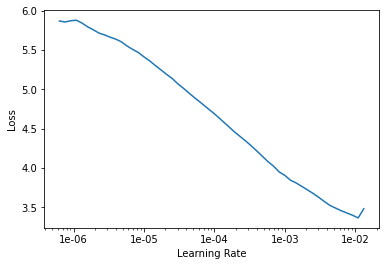

In [35]:
lr_find(learn)
learn.recorder.plot()

In [36]:
lr=3e-3

In [37]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.423446,1.007470,0.741980,03:13
1,0.922752,0.659665,0.835009,03:09
2,0.711762,0.591510,0.851591,03:09
3,0.664569,0.649785,0.832806,03:08
4,0.744066,0.767636,0.832884,03:08
5,0.623977,0.572498,0.851855,03:07
6,0.560049,0.489894,0.868166,03:06
7,0.552436,0.420550,0.880621,03:06
8,0.508313,0.405248,0.886372,03:05
9,0.441176,0.339349,0.897502,03:05


In [38]:
learn.save('stage-1')

In [39]:
learn.load('stage-1');

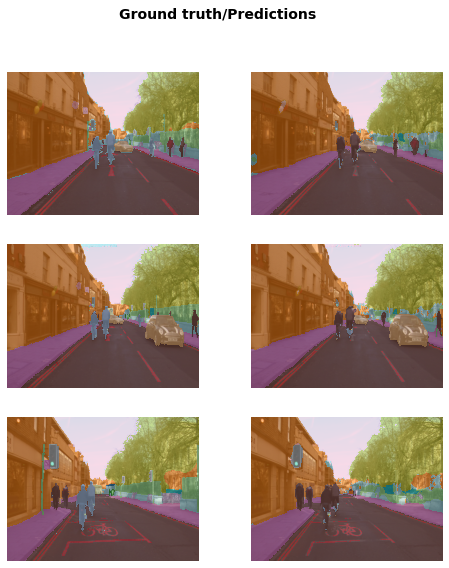

In [40]:
learn.show_results(rows=3, figsize=(8,9))

In [41]:
learn.unfreeze()

In [42]:
lrs = slice(lr/400,lr/4)

In [43]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.379064,0.339453,0.896129,03:13
1,0.369102,0.336902,0.898368,03:13
2,0.358174,0.314600,0.909799,03:13
3,0.351938,0.325818,0.903523,03:13
4,0.339744,0.319159,0.907302,03:13
5,0.330099,0.304127,0.914099,03:13
6,0.323740,0.300116,0.910895,03:13
7,0.310717,0.317085,0.907691,03:13
8,0.303306,0.289191,0.917890,03:13
9,0.293549,0.296783,0.915282,03:13


In [45]:
learn.save('stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [ ]:
learn.destroy()

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [31]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [32]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [33]:
learn.load('stage-2');

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


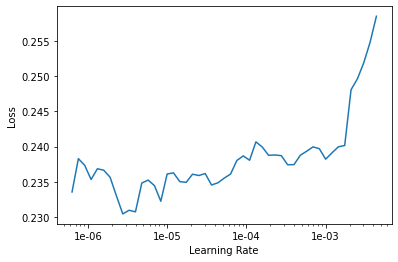

In [34]:
lr_find(learn)
learn.recorder.plot()

In [35]:
lr=1e-3

In [36]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.234790,0.270071,0.925743,03:13
1,0.234007,0.286034,0.922017,03:09
2,0.234258,0.270827,0.926066,03:09
3,0.241058,0.304892,0.919132,03:09
4,0.240002,0.289945,0.921493,03:09
5,0.247598,0.264671,0.927230,03:09
6,0.254414,0.284400,0.924494,03:09
7,0.250442,0.313804,0.913527,03:09
8,0.239225,0.259204,0.929754,03:09
9,0.215611,0.265098,0.928698,03:09


In [37]:
learn.save('stage-1-big')

In [38]:
learn.load('stage-1-big');

In [39]:
learn.unfreeze()

In [40]:
lrs = slice(1e-6,lr/10)

In [41]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.200724,0.259733,0.929937,03:17
1,0.199242,0.262375,0.929432,03:16
2,0.198929,0.259067,0.930812,03:16
3,0.195376,0.263019,0.930998,03:16
4,0.195033,0.264439,0.930244,03:16
5,0.194007,0.264163,0.930282,03:16
6,0.190152,0.267674,0.929394,03:16
7,0.186239,0.270494,0.929610,03:16
8,0.184569,0.268488,0.930299,03:16
9,0.184224,0.270721,0.929896,03:16


In [42]:
learn.save('stage-2-big')

In [43]:
learn.load('stage-2-big');

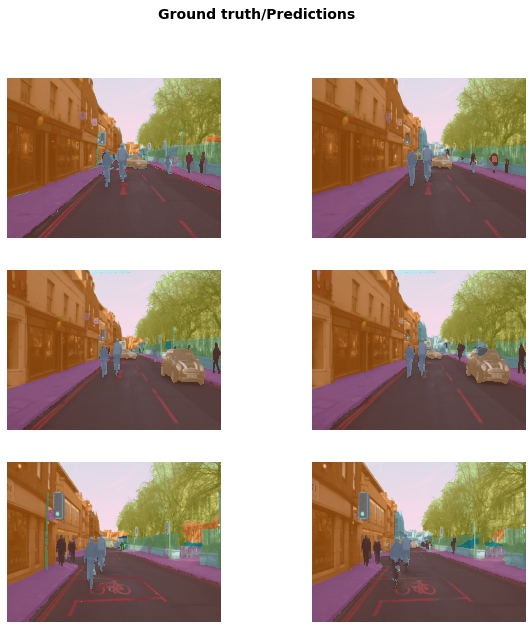

In [44]:
learn.show_results(rows=3, figsize=(10,10))

## fin